# Project Euler

This notebook contains my problem-solving code used to answer the various challenges posted on the website https://projecteuler.net. It is often cited as good coding practice, to get used to things like basic algorithms, data structures, optimization, and so on. My main focus in coding practice is undoubtedly about data, statistics, inference and knowledge discovery. On the other hand, I am starting more and more to think that a strong base in algorithms and use of Python's built-ins and will be more beneficial than just starting in the deep end with numpy, pandas, sk-learn, tensorflow and whatnot -- right away. Code complexity and performance when submitting to production might just we worth more in the long run.

Sideways inspiration for this practice is the Google whitepaper [Machine Learning: The High-Interest Credit Card of Technical Debt](https://static.googleusercontent.com/media/research.google.com/en/us/pubs/archive/43146.pdf).

## Problem 1: Multiples of 3 and 5
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

In [1]:
print(sum([n for n in range(1000) if n % 3 == 0 or n % 5 == 0]))

233168


## Problem 2: Even Fibonacci numbers
Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

    1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.


In [2]:
"""I end up using this decorator often to add 'dynamic programming'
style solving capabilities to problems. Is it perfect? No. But it
can sometimes speed some things up dramatically with the addition
of just an extra line of code.

Shamelessly copied from:
https://wiki.python.org/moin/PythonDecoratorLibrary
"""

import collections
import functools

class memoized(object):
    '''Decorator. Caches a function's return value each time it is called.
    If called later with the same arguments, the cached value is returned
    (not reevaluated).
    '''
    def __init__(self, func):
        self.func = func
        self.cache = {}
    def __call__(self, *args):
        if not isinstance(args, collections.Hashable):
             # uncacheable. a list, for instance.
             # better to not cache than blow up.
             return self.func(*args)
        if args in self.cache:
             return self.cache[args]
        else:
             value = self.func(*args)
             self.cache[args] = value
             return value
    def __repr__(self):
        '''Return the function's docstring.'''
        return self.func.__doc__
    def __get__(self, obj, objtype):
        '''Support instance methods.'''
        return functools.partial(self.__call__, obj)

In [3]:
@memoized
def fib(n):
    a = b = 1
    for i in range(n):
        yield a
        a, b = b, a + b

def even_fib():
    sum_ = 0
    for i in list(fib(100)):
        if i < 4000000:
            if i % 2 == 0:
                sum_ += i
            else:
                pass
        else:
            pass
    return sum_

print(even_fib())

4613732


## Problem 3: Largest prime factor
The prime factors of 13195 are 5, 7, 13 and 29.

What is the largest prime factor of the number 600851475143 ?

In [4]:
import math

def primes_sieve(limit):
    """Sieve of Erastostenes up to $limit.
    TODO: Set up as generator
    int -> [int,]"""
    limitn = limit+1
    not_prime = set()
    primes = []

    for i in range(2, limitn):
        if i in not_prime:
            continue

        for f in range(i*2, limitn, i):
            not_prime.add(f)

        primes.append(i)

    return primes

def problem_3():
    """Generate list of candidate primes, return first one
    that matches. Get list of primes by starting at sqrt($big_num)
    and going downwards"""
    big_num = 600851475143
    start_n = int(math.sqrt(big_num) + 1)
    return max([n for n in primes_sieve(start_n) if big_num % n == 0])

print(problem_3())

6857


## Problem 4: Largest palindrome product
A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.


In [5]:
def is_palindrome(num):
    """Takes list of three integer strings, outputs True or False"""
    return str(num) == str(num)[::-1]

def problem_4():
    """Goes through every pair of 3-digit numbers, sees if 
    product is a palindrome."""
    palindromes = []
    for i in range(100, 1000):
        for j in range(100, 1000):
            if is_palindrome(i * j) == True:
                palindromes.append(i * j)
            else:
                pass
    return palindromes
print(max(problem_4()))

906609


## Problem 5: Smallest multiple
2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder.

What is the smallest positive number that is evenly divisible by all of the numbers from 1 to 20?


In [6]:
# Python has a Greatest Common Divisor (GCD) method we can
# use to get to the Least Common Denominator (LCD).
# Instead of looping over numbers, simply multiply the terms.
from math import gcd

def problem_5(n=20):
    """The LCD is the product of the greatest common divisors
    between all numbers from 1 to n, default n = 20.
    (int) -> int"""
    num = 1
    for i in range(1, n + 1):
        num *= i // gcd(i, num)
    return num

print(problem_5())

232792560


### Addendum: Problem 5
Out of curiosity, what is the value for the first 500 integers?

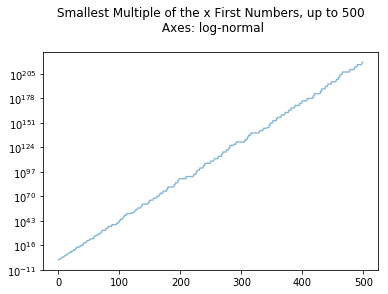

In [7]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

first_500_sm = [float(problem_5(n)) for n in range(1, 501)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_title('Smallest Multiple of the x First Numbers, up to 500\n Axes: log-normal\n')
ax.plot(first_500_sm, color='#348ABD', lw=1.4, alpha=0.6)
plt.show()

Now that's really interesting! The fact that it plots as an almost straight line in a log-normal plot means it can be approximated well with a best-fit exponential curve. Let's take a look at the parameters that come out:


Curve of best fit: y = 1.80602962 * exp(1.00278424 x)


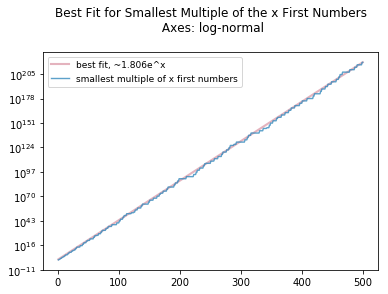

In [8]:
x = np.array(range(1, 501))
y = np.array(first_500_sm)

# Fit for y = Ae^(Bx)
B, A = np.polyfit(-x, -np.log(y), 1)
print('\nCurve of best fit: y = {0} * exp({1} x)'.format(round(A, 8), round(B, 8)))

z = A*(np.exp(B*x))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_title('Best Fit for Smallest Multiple of the x First Numbers\n Axes: log-normal\n')
ax.plot(x, z, lw=2.1, alpha=0.3, c="#A60628", label='best fit, ~1.806e^x')
ax.plot(x, y, color='#348ABD', lw=1.4, alpha=0.8, label='smallest multiple of x first numbers')
plt.legend(loc=2, prop={'size':9})
plt.show()

Now as the B parameter is suspiciously close to 1, and -- at least according to [Wolfram Alpha](https://www.wolframalpha.com/input/?i=1.806029) --  the A parameter is close to

$$2 \frac{(1 + \pi)}{(\pi - 1)^2},$$

I'm guessing the whole equation boils down to some number-theoretical equation proven a long time ago. Maybe something along the lines of:

$$ SM_x \approx 2 \frac{(1 + \pi)}{(\pi - 1)^2}  \exp{(x)}?$$

Now granted, I might be over-reaching a little in my extrapolation, but it is always so fascinating to see [e and pi magically appear](https://en.wikipedia.org/wiki/Mathematical_coincidence#Containing_both_.CF.80_and_e) when working with natural numbers. In any case, if you have any leads, please reach out! Shedding more light on this would be appreciated. I can't say I ever took number a theory course either, so, win-win.

    </addendum>

## Problem 6: Sum square difference
The sum of the squares of the first ten natural numbers is,
1<sup>2</sup> + 2<sup>2</sup> + ... + 10<sup>2</sup> = 385

The square of the sum of the first ten natural numbers is,
(1 + 2 + ... + 10)<sup>2</sup> = 55<sup>2</sup> = 3025

Hence the difference between the sum of the squares of the first ten natural numbers and the square of the sum is 3025 − 385 = 2640.

Find the difference between the sum of the squares of the first one hundred natural numbers and the square of the sum.


In [9]:
def problem_6():
    sum_of_squares = sum([n**2 for n in range(1, 101)])
    square_of_sums = sum([n for n in range(1, 101)])**2
    return square_of_sums - sum_of_squares

print(problem_6())

25164150


## Problem 7: 10001st prime
By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.

What is the 10 001st prime number?


In [10]:
"""We already have a primes_sieve function set up, all we need is an upper bound
so that we get the 10001th prime.
"""
print(primes_sieve(500000)[10001 - 1])

104743


## Problem 8: Largest product in a series
The four adjacent digits in the 1000-digit number that have the greatest product are 9 × 9 × 8 × 9 = 5832.

    73167176531330624919225119674426574742355349194934
    96983520312774506326239578318016984801869478851843
    85861560789112949495459501737958331952853208805511
    12540698747158523863050715693290963295227443043557
    66896648950445244523161731856403098711121722383113
    62229893423380308135336276614282806444486645238749
    30358907296290491560440772390713810515859307960866
    70172427121883998797908792274921901699720888093776
    65727333001053367881220235421809751254540594752243
    52584907711670556013604839586446706324415722155397
    53697817977846174064955149290862569321978468622482
    83972241375657056057490261407972968652414535100474
    82166370484403199890008895243450658541227588666881
    16427171479924442928230863465674813919123162824586
    17866458359124566529476545682848912883142607690042
    24219022671055626321111109370544217506941658960408
    07198403850962455444362981230987879927244284909188
    84580156166097919133875499200524063689912560717606
    05886116467109405077541002256983155200055935729725
    71636269561882670428252483600823257530420752963450

Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?


In [11]:
def prod(iterable):
    from functools import reduce
    """There is no built-in method for product similar to sum().
    This funciton is inelegant and a little cryptic, but I'm
    compensating with this long-winded explanation instead.
    The lambda expression creates an accumulator y, and multiplies
    it with every element of the iterable.
    
    Note: itertools.accumulate(iterable, func=operator.mul) would
    work, but not on bare ints.
    
    iterable_containing_int -> int"""
    return reduce(lambda x, y: int(x)*int(y), iterable)

def problem_8():
    big_num = '7316717653133062491922511967442657474235534919493496983520312774506326239578318016984801869478851843858615607891129494954595017379583319528532088055111254069874715852386305071569329096329522744304355766896648950445244523161731856403098711121722383113622298934233803081353362766142828064444866452387493035890729629049156044077239071381051585930796086670172427121883998797908792274921901699720888093776657273330010533678812202354218097512545405947522435258490771167055601360483958644670632441572215539753697817977846174064955149290862569321978468622482839722413756570560574902614079729686524145351004748216637048440319989000889524345065854122758866688116427171479924442928230863465674813919123162824586178664583591245665294765456828489128831426076900422421902267105562632111110937054421750694165896040807198403850962455444362981230987879927244284909188845801561660979191338754992005240636899125607176060588611646710940507754100225698315520005593572972571636269561882670428252483600823257530420752963450'
    slices = [num for i in range(0, 1000 - 13) for num in [big_num[i:i + 13]]]
    return max([prod(s) for s in slices])
    
print(problem_8())

23514624000


## Problem 9: Special Pythagorean triplet
A Pythagorean triplet is a set of three natural numbers, a < b < c, for which,
a<sup>2</sup> + b<sup>2</sup> = c<sup>2</sup>

For example, 3<sup>2</sup> + 4<sup>2</sup> = 9 + 16 = 25 = 5<sup>2</sup>.

There exists exactly one Pythagorean triplet for which a + b + c = 1000.
Find the product abc.

In [12]:
# Get the set of int. triplets for which a + b + c = 1000

def problem_9():
    for i in range(1, 1001):
        for j in range(1 + i, 1001):
            k = 1000 - i - j
            if i**2 + j**2 == k**2:
                return i * j * k

print(problem_9())

31875000


## Problem 10: Summation of primes
The sum of the primes below 10 is 2 + 3 + 5 + 7 = 17.

Find the sum of all the primes below two million.

In [13]:
print(sum(primes_sieve(1999999)))

142913828922


## Problem 11: Largest product in a grid
In the 20×20 grid below, four numbers along a diagonal line have been ~~marked in red~~ pointed with arrows a-d.

                                a  b  c  d
                                v  v  v  v
        08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
        49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
        81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
        52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
        22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
        24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
    a>  32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
    b>  67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
    c>  24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
    d>  21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
        78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
        16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
        86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
        19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
        04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
        88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
        04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
        20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
        20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
        01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48

The product of these numbers is 26 × 63 × 78 × 14 = 1788696.

What is the greatest product of four adjacent numbers in the same direction (up, down, left, right, or diagonally) in the 20×20 grid?


In [14]:
import numpy as np

def problem_11():
    """There are 4 distinct ways with which the array can be sliced,
    including two diagonals. We create a big list of 4-number lists,
    and take the maximum product of these. The inverse dataframe is
    used to take the 'anti-clockwise' diagonals.
    
    The indexes will go out of bounds for a few cases, but their results
    are simply discarded as we are only looking for the maximum.
    
    Using numpy, as diagonal slicing and products are directly handled.
    /lazy"""
    df = np.array([
    [ 8, 2,22,97,38,15, 0,40, 0,75, 4, 5, 7,78,52,12,50,77,91, 8],
    [49,49,99,40,17,81,18,57,60,87,17,40,98,43,69,48, 4,56,62, 0],
    [81,49,31,73,55,79,14,29,93,71,40,67,53,88,30, 3,49,13,36,65],
    [52,70,95,23, 4,60,11,42,69,24,68,56, 1,32,56,71,37, 2,36,91],
    [22,31,16,71,51,67,63,89,41,92,36,54,22,40,40,28,66,33,13,80],
    [24,47,32,60,99, 3,45, 2,44,75,33,53,78,36,84,20,35,17,12,50],
    [32,98,81,28,64,23,67,10,26,38,40,67,59,54,70,66,18,38,64,70],
    [67,26,20,68, 2,62,12,20,95,63,94,39,63, 8,40,91,66,49,94,21],
    [24,55,58, 5,66,73,99,26,97,17,78,78,96,83,14,88,34,89,63,72],
    [21,36,23, 9,75, 0,76,44,20,45,35,14, 0,61,33,97,34,31,33,95],
    [78,17,53,28,22,75,31,67,15,94, 3,80, 4,62,16,14, 9,53,56,92],
    [16,39, 5,42,96,35,31,47,55,58,88,24, 0,17,54,24,36,29,85,57],
    [86,56, 0,48,35,71,89, 7, 5,44,44,37,44,60,21,58,51,54,17,58],
    [19,80,81,68, 5,94,47,69,28,73,92,13,86,52,17,77, 4,89,55,40],
    [ 4,52, 8,83,97,35,99,16, 7,97,57,32,16,26,26,79,33,27,98,66],
    [88,36,68,87,57,62,20,72, 3,46,33,67,46,55,12,32,63,93,53,69],
    [ 4,42,16,73,38,25,39,11,24,94,72,18, 8,46,29,32,40,62,76,36],
    [20,69,36,41,72,30,23,88,34,62,99,69,82,67,59,85,74, 4,36,16],
    [20,73,35,29,78,31,90, 1,74,31,49,71,48,86,81,16,23,57, 5,54],
    [ 1,70,54,71,83,51,54,69,16,92,33,48,61,43,52, 1,89,19,67,48],
    ], dtype=np.uint8)
    df_inv = df[::-1]
    
    max_product = 0
    for i in range(20):
        for j in range(20):
            horiz = np.prod( df[i][j:j+4] )
            verti = np.prod( df[:,j][i:i+4] )
            d = min(i, j)
            diag_1 = np.prod( np.diagonal(df, j-i)[ d:d+4 ] )
            diag_2 = np.prod( np.diagonal(df_inv, j-i)[ d:d+4 ] )
            max_product = max([max_product, horiz, verti, diag_1, diag_2])
    return max_product

print(problem_11())

70600674


## Problem 12: Highly divisible triangular number
The sequence of triangle numbers is generated by adding the natural numbers. So the 7th triangle number would be:

    1 + 2 + 3 + 4 + 5 + 6 + 7 = 28.

The first ten terms would be:

    1, 3, 6, 10, 15, 21, 28, 36, 45, 55, ...

Let us list the factors of the first seven triangle numbers:

     1: 1
     3: 1,3
     6: 1,2,3,6
    10: 1,2,5,10
    15: 1,3,5,15
    21: 1,3,7,21
    28: 1,2,4,7,14,28

We can see that 28 is the first triangle number to have over five divisors.

What is the value of the first triangle number to have over five hundred divisors?

In [15]:
import itertools
import math

@memoized
def triangle_number(n):
    """Returns nth Pascal's triangular number
    int -> int"""
    return sum(range(n + 1))

def num_divisors(num):
    """Returns the number of distinct divisors a given integers has.
    End number given as sqrt(num) as we get no bigger. Special case
    when num is perfect square, divs -= 1.
    int -> int"""
    divs = 0
    end = int(math.sqrt(num))
    for i in range(1, end + 1):
        if num % i == 0:
            divs += 2
    if end**2 == num:
        divs -= 1
    return divs

def problem_12(n=1):
    for i in itertools.count(n):  # count() is open-ended range()
        t = triangle_number(i)
        divs = num_divisors(t)
        if divs > 500:
            return t
        else:
            pass
        
print(problem_12(10000))  # Refined search after the fact for faster load times

76576500


## Problem 13: Large sum

Work out the first ten digits of the sum of the following one-hundred 50-digit numbers.

    37107287533902102798797998220837590246510135740250
    46376937677490009712648124896970078050417018260538
    74324986199524741059474233309513058123726617309629
    91942213363574161572522430563301811072406154908250
    23067588207539346171171980310421047513778063246676
    89261670696623633820136378418383684178734361726757
    28112879812849979408065481931592621691275889832738
    44274228917432520321923589422876796487670272189318
    47451445736001306439091167216856844588711603153276
    70386486105843025439939619828917593665686757934951
    62176457141856560629502157223196586755079324193331
    64906352462741904929101432445813822663347944758178
    92575867718337217661963751590579239728245598838407
    58203565325359399008402633568948830189458628227828
    80181199384826282014278194139940567587151170094390
    35398664372827112653829987240784473053190104293586
    86515506006295864861532075273371959191420517255829
    71693888707715466499115593487603532921714970056938
    54370070576826684624621495650076471787294438377604
    53282654108756828443191190634694037855217779295145
    36123272525000296071075082563815656710885258350721
    45876576172410976447339110607218265236877223636045
    17423706905851860660448207621209813287860733969412
    81142660418086830619328460811191061556940512689692
    51934325451728388641918047049293215058642563049483
    62467221648435076201727918039944693004732956340691
    15732444386908125794514089057706229429197107928209
    55037687525678773091862540744969844508330393682126
    18336384825330154686196124348767681297534375946515
    80386287592878490201521685554828717201219257766954
    78182833757993103614740356856449095527097864797581
    16726320100436897842553539920931837441497806860984
    48403098129077791799088218795327364475675590848030
    87086987551392711854517078544161852424320693150332
    59959406895756536782107074926966537676326235447210
    69793950679652694742597709739166693763042633987085
    41052684708299085211399427365734116182760315001271
    65378607361501080857009149939512557028198746004375
    35829035317434717326932123578154982629742552737307
    94953759765105305946966067683156574377167401875275
    88902802571733229619176668713819931811048770190271
    25267680276078003013678680992525463401061632866526
    36270218540497705585629946580636237993140746255962
    24074486908231174977792365466257246923322810917141
    91430288197103288597806669760892938638285025333403
    34413065578016127815921815005561868836468420090470
    23053081172816430487623791969842487255036638784583
    11487696932154902810424020138335124462181441773470
    63783299490636259666498587618221225225512486764533
    67720186971698544312419572409913959008952310058822
    95548255300263520781532296796249481641953868218774
    76085327132285723110424803456124867697064507995236
    37774242535411291684276865538926205024910326572967
    23701913275725675285653248258265463092207058596522
    29798860272258331913126375147341994889534765745501
    18495701454879288984856827726077713721403798879715
    38298203783031473527721580348144513491373226651381
    34829543829199918180278916522431027392251122869539
    40957953066405232632538044100059654939159879593635
    29746152185502371307642255121183693803580388584903
    41698116222072977186158236678424689157993532961922
    62467957194401269043877107275048102390895523597457
    23189706772547915061505504953922979530901129967519
    86188088225875314529584099251203829009407770775672
    11306739708304724483816533873502340845647058077308
    82959174767140363198008187129011875491310547126581
    97623331044818386269515456334926366572897563400500
    42846280183517070527831839425882145521227251250327
    55121603546981200581762165212827652751691296897789
    32238195734329339946437501907836945765883352399886
    75506164965184775180738168837861091527357929701337
    62177842752192623401942399639168044983993173312731
    32924185707147349566916674687634660915035914677504
    99518671430235219628894890102423325116913619626622
    73267460800591547471830798392868535206946944540724
    76841822524674417161514036427982273348055556214818
    97142617910342598647204516893989422179826088076852
    87783646182799346313767754307809363333018982642090
    10848802521674670883215120185883543223812876952786
    71329612474782464538636993009049310363619763878039
    62184073572399794223406235393808339651327408011116
    66627891981488087797941876876144230030984490851411
    60661826293682836764744779239180335110989069790714
    85786944089552990653640447425576083659976645795096
    66024396409905389607120198219976047599490197230297
    64913982680032973156037120041377903785566085089252
    16730939319872750275468906903707539413042652315011
    94809377245048795150954100921645863754710598436791
    78639167021187492431995700641917969777599028300699
    15368713711936614952811305876380278410754449733078
    40789923115535562561142322423255033685442488917353
    44889911501440648020369068063960672322193204149535
    41503128880339536053299340368006977710650566631954
    81234880673210146739058568557934581403627822703280
    82616570773948327592232845941706525094512325230608
    22918802058777319719839450180888072429661980811197
    77158542502016545090413245809786882778948721859617
    72107838435069186155435662884062257473692284509516
    20849603980134001723930671666823555245252804609722
    53503534226472524250874054075591789781264330331690

In [16]:
nums = [
    37107287533902102798797998220837590246510135740250,
    46376937677490009712648124896970078050417018260538,
    74324986199524741059474233309513058123726617309629,
    91942213363574161572522430563301811072406154908250,
    23067588207539346171171980310421047513778063246676,
    89261670696623633820136378418383684178734361726757,
    28112879812849979408065481931592621691275889832738,
    44274228917432520321923589422876796487670272189318,
    47451445736001306439091167216856844588711603153276,
    70386486105843025439939619828917593665686757934951,
    62176457141856560629502157223196586755079324193331,
    64906352462741904929101432445813822663347944758178,
    92575867718337217661963751590579239728245598838407,
    58203565325359399008402633568948830189458628227828,
    80181199384826282014278194139940567587151170094390,
    35398664372827112653829987240784473053190104293586,
    86515506006295864861532075273371959191420517255829,
    71693888707715466499115593487603532921714970056938,
    54370070576826684624621495650076471787294438377604,
    53282654108756828443191190634694037855217779295145,
    36123272525000296071075082563815656710885258350721,
    45876576172410976447339110607218265236877223636045,
    17423706905851860660448207621209813287860733969412,
    81142660418086830619328460811191061556940512689692,
    51934325451728388641918047049293215058642563049483,
    62467221648435076201727918039944693004732956340691,
    15732444386908125794514089057706229429197107928209,
    55037687525678773091862540744969844508330393682126,
    18336384825330154686196124348767681297534375946515,
    80386287592878490201521685554828717201219257766954,
    78182833757993103614740356856449095527097864797581,
    16726320100436897842553539920931837441497806860984,
    48403098129077791799088218795327364475675590848030,
    87086987551392711854517078544161852424320693150332,
    59959406895756536782107074926966537676326235447210,
    69793950679652694742597709739166693763042633987085,
    41052684708299085211399427365734116182760315001271,
    65378607361501080857009149939512557028198746004375,
    35829035317434717326932123578154982629742552737307,
    94953759765105305946966067683156574377167401875275,
    88902802571733229619176668713819931811048770190271,
    25267680276078003013678680992525463401061632866526,
    36270218540497705585629946580636237993140746255962,
    24074486908231174977792365466257246923322810917141,
    91430288197103288597806669760892938638285025333403,
    34413065578016127815921815005561868836468420090470,
    23053081172816430487623791969842487255036638784583,
    11487696932154902810424020138335124462181441773470,
    63783299490636259666498587618221225225512486764533,
    67720186971698544312419572409913959008952310058822,
    95548255300263520781532296796249481641953868218774,
    76085327132285723110424803456124867697064507995236,
    37774242535411291684276865538926205024910326572967,
    23701913275725675285653248258265463092207058596522,
    29798860272258331913126375147341994889534765745501,
    18495701454879288984856827726077713721403798879715,
    38298203783031473527721580348144513491373226651381,
    34829543829199918180278916522431027392251122869539,
    40957953066405232632538044100059654939159879593635,
    29746152185502371307642255121183693803580388584903,
    41698116222072977186158236678424689157993532961922,
    62467957194401269043877107275048102390895523597457,
    23189706772547915061505504953922979530901129967519,
    86188088225875314529584099251203829009407770775672,
    11306739708304724483816533873502340845647058077308,
    82959174767140363198008187129011875491310547126581,
    97623331044818386269515456334926366572897563400500,
    42846280183517070527831839425882145521227251250327,
    55121603546981200581762165212827652751691296897789,
    32238195734329339946437501907836945765883352399886,
    75506164965184775180738168837861091527357929701337,
    62177842752192623401942399639168044983993173312731,
    32924185707147349566916674687634660915035914677504,
    99518671430235219628894890102423325116913619626622,
    73267460800591547471830798392868535206946944540724,
    76841822524674417161514036427982273348055556214818,
    97142617910342598647204516893989422179826088076852,
    87783646182799346313767754307809363333018982642090,
    10848802521674670883215120185883543223812876952786,
    71329612474782464538636993009049310363619763878039,
    62184073572399794223406235393808339651327408011116,
    66627891981488087797941876876144230030984490851411,
    60661826293682836764744779239180335110989069790714,
    85786944089552990653640447425576083659976645795096,
    66024396409905389607120198219976047599490197230297,
    64913982680032973156037120041377903785566085089252,
    16730939319872750275468906903707539413042652315011,
    94809377245048795150954100921645863754710598436791,
    78639167021187492431995700641917969777599028300699,
    15368713711936614952811305876380278410754449733078,
    40789923115535562561142322423255033685442488917353,
    44889911501440648020369068063960672322193204149535,
    41503128880339536053299340368006977710650566631954,
    81234880673210146739058568557934581403627822703280,
    82616570773948327592232845941706525094512325230608,
    22918802058777319719839450180888072429661980811197,
    77158542502016545090413245809786882778948721859617,
    72107838435069186155435662884062257473692284509516,
    20849603980134001723930671666823555245252804609722,
    53503534226472524250874054075591789781264330331690,
]

print(str(sum(nums))[0:10])

5537376230


## Problem 14: Longest Collatz sequence

The following iterative sequence is defined for the set of positive integers:

    n → n/2 (n is even)
    n → 3n + 1 (n is odd)

Using the rule above and starting with 13, we generate the following sequence:

    13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1

It can be seen that this sequence (starting at 13 and finishing at 1) contains 10 terms. Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at 1.

Which starting number, under one million, produces the longest chain?

NOTE: Once the chain starts the terms are allowed to go above one million.


In [17]:
import time
from tqdm import *

@memoized
def collatz(value):
    """Generator that spits out next in Collatz series given 'value'.
    int -> int"""
    n = value
    yield n
    while n != 1:
        if n % 2 == 0: 
            n = n // 2
            yield n
        else:
            n = 3 * n +1
            yield n
            
def problem_14():
    max_seq = 0
    max_num = 1
    for i in tqdm(range(1, 1000001)):
        seq = len(list(collatz(i)))
        if seq > max_seq:
            max_seq = seq
            max_num = i
    return max_num

print(problem_14())

100%|██████████| 1000000/1000000 [01:07<00:00, 14706.68it/s]

837799


## Problem 15: Lattice paths
Starting in the top left corner of a 2×2 grid, and only being able to move to the right and down, there are exactly 6 routes to the bottom right corner.

How many such routes are there through a 20×20 grid?


In [18]:
# Assume "paths of length 40" was meant? Otherwise this becomes
# a whole different problem altogether. Seems like a '40 choose 20'
# -type problem from combinatorics. 

# Anyhow, naively brute-forcing worked, so I'm not touching it.

@memoized
def lattice(node=(0, 0)):
    n = 0
    k = 20
    if node[0] == k and node[1] == k:
        return 1
    if node[0] < k + 1 and node[1] < k + 1:
        n += lattice((node[0] + 1, node[1]))
        n += lattice((node[0], node[1] + 1))
    return n

print(lattice())

137846528820


## Problem 16: Power digit sum

2<sup>15</sup> = 32768 and the sum of its digits is 3 + 2 + 7 + 6 + 8 = 26.

What is the sum of the digits of the number 2<sup>1000</sup>?


In [19]:
print(sum([int(n) for n in str(2**1000)]))

1366


## Problem 17: Number letter counts
If the numbers 1 to 5 are written out in words: one, two, three, four, five, then there are 3 + 3 + 5 + 4 + 4 = 19 letters used in total.

If all the numbers from 1 to 1000 (one thousand) inclusive were written out in words, how many letters would be used?

NOTE: Do not count spaces or hyphens. For example, 342 (three hundred and forty-two) contains 23 letters and 115 (one hundred and fifteen) contains 20 letters. The use of "and" when writing out numbers is in compliance with British usage.

In [20]:
def number_name(n):
    """Returns the written-out string of the integer in the argument.
    Range: (1, 1000).
    int -> str"""

    digits = ['', 'one', 'two', 'three', 'four', 'five', 'six', 'seven',
              'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen',
              'fourteen', 'fifteen', 'sixteen', 'seventeen', 'eighteen',
              'nineteen']
    decades = ['-', '-', 'twenty', 'thirty', 'forty', 'fifty', 'sixty',
              'seventy', 'eighty', 'ninety']
    
    if 0 < n < 20:
        return digits[n]
    elif 20 <= n < 100:
        return decades[n // 10] + ('-' + digits[n % 10]
                                   if (n % 10 != 0) else "")
    elif 100 <= n < 1000:
        return digits[n // 100] + " hundred " + (("and " +
                        number_name(n % 100)) if (n % 100 != 0) else "")
    elif 1000:
        return 'one thousand'
    else:
        raise ValueError('Please use numbers 1 to 1000.')
        
# I know, it's odd to add spaces and dashes in the function,
# only to strip them away in the compute phase. But I figure
# the number_name(n) function might come in handy down the line.
print(len([char for n in range(1, 1001) for char in number_name(n)
           if char in 'abcdefghijklmnopqrstuvwxyz']))

21124


## Problem 18: Maximum path sum I
By starting at the top of the triangle below and moving to adjacent numbers on the row below, the maximum total from top to bottom is 23.

       3
      7 4
     2 4 6
    8 5 9 3

That is, 3 + 7 + 4 + 9 = 23.

Find the maximum total from top to bottom of the triangle below:

                          75
                        95 64
                       17 47 82
                     18 35 87 10
                    20 04 82 47 65
                  19 01 23 75 03 34
                 88 02 77 73 07 63 67
               99 65 04 28 06 16 70 92
              41 41 26 56 83 40 80 70 33
            41 48 72 33 47 32 37 16 94 29
           53 71 44 65 25 43 91 52 97 51 14
         70 11 33 28 77 73 17 78 39 68 17 57
        91 71 52 38 17 14 91 43 58 50 27 29 48
       63 66 04 68 89 53 67 30 73 16 69 87 40 31
     04 62 98 27 23 09 70 98 73 93 38 53 60 04 23

*NOTE: As there are only 16384 routes, it is possible to solve this problem by trying every route. However, Problem 67, is the same challenge with a triangle containing one-hundred rows; it cannot be solved by brute force, and requires a clever method! ;o)*


In [21]:
"""Given the note, well, I guess I'll cross that bridge if and when
I get to problem 67. For now, I'll just brute force and memoize. ;)

From the data 'triangle' below, we have to bound our path from
one level to the next to either the same index or the following one."""

problem_18_data = [ [75],
                    [95,64],
                    [17,47,82],
                    [18,35,87,10],
                    [20, 4,82,47,65],
                    [19, 1,23,75, 3,34],
                    [88, 2,77,73, 7,63,67],
                    [99,65, 4,28, 6,16,70,92],
                    [41,41,26,56,83,40,80,70,33],
                    [41,48,72,33,47,32,37,16,94,29],
                    [53,71,44,65,25,43,91,52,97,51,14],
                    [70,11,33,28,77,73,17,78,39,68,17,57],
                    [91,71,52,38,17,14,91,43,58,50,27,29,48],
                    [63,66, 4,68,89,53,67,30,73,16,69,87,40,31],
                    [ 4,62,98,27,23, 9,70,98,73,93,38,53,60, 4,23],
]

@memoized
def all_paths(r=0, c=0, df=problem_18_data):
    """Takes path with stride 0 or +1, returns list of all paths
    possible in the data triangle.
    (int, int) -> [[int,],]"""
    current = df[r][c]
    if r < len(df) - 1:
        down_paths = all_paths(r + 1, c) + all_paths(r + 1, c + 1)
        return [[current] + path for path in down_paths]
    else:
        return [[current]]

print(max([sum(path) for path in all_paths()]))

1074


## Problem 19: Counting Sundays
You are given the following information, but you may prefer to do some research for yourself.

    1 Jan 1900 was a Monday.
    Thirty days has September,
    April, June and November.
    All the rest have thirty-one,
    Saving February alone,
    Which has twenty-eight, rain or shine.
    And on leap years, twenty-nine.
    A leap year occurs on any year evenly divisible by 4,
    but not on a century unless it is divisible by 400.

How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?

In [22]:
def problem_19():
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    reg_days_months = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    leap_days_months = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    years = [n for n in range(1901, 2001)]
    leap_years = [n for n in range(1901, 2001) if
                  (n % 4 == 0 and n % 100 != 0) or n % 400 == 0]
    reg_calendar = [i for n in reg_days_months for i in range(1, n+1)]
    leap_calendar =[i for n in leap_days_months for i in range(1, n+1)]

    millenium = []
    for y in years:
        if y in leap_years:
            for d in leap_calendar:
                millenium.append(d)
        else:
            for d in reg_calendar:
                millenium.append(d)
    
    # Cycle the days of the week, attach it every day number in
    # the millenium calendar.
    millenium = list(zip(millenium, itertools.cycle(days)))
    return len([day for day in millenium if day == (1, 'Mon')])

print(problem_19())

171


## Problem 20: Factorial digit sum
n! means n × (n − 1) × ... × 3 × 2 × 1

For example, 10! = 10 × 9 × ... × 3 × 2 × 1 = 3628800,
and the sum of the digits in the number 10! is 3 + 6 + 2 + 8 + 8 + 0 + 0 = 27.

Find the sum of the digits in the number 100!

In [23]:
print(sum([int(n) for n in str(math.factorial(100))]))

648


## Problem 21: Amicable numbers
Let d(n) be defined as the sum of proper divisors of n (numbers less than n which divide evenly into n).
If d(a) = b and d(b) = a, where a ≠ b, then a and b are an amicable pair and each of a and b are called amicable numbers.

For example, the proper divisors of 220 are 1, 2, 4, 5, 10, 11, 20, 22, 44, 55 and 110; therefore d(220) = 284. The proper divisors of 284 are 1, 2, 4, 71 and 142; so d(284) = 220.

Evaluate the sum of all the amicable numbers under 10000.


In [24]:
from tqdm import *

@memoized
def divisors_sum(i):
    """Returns the sum of all proper divisors for integer i
    int -> int."""
    return sum([d for d in range(1, (i+1 // 2)) if i % d == 0])

def amicable_numbers(n=10000):
    """Returns the list of amicable number pairs up to n;
    Default: n = 10000.
    Amicable numbers are defined as pairs of numbers whose
    sum of proper divisors is equal. e.g.: The proper divisors
    of 220 are 1, 2, 4, 5, 10, 11, 20, 22, 44, 55 and 110;
    therefore d(220) = 284. The proper divisors of 284 are
    1, 2, 4, 71 and 142; so d(284) = 220.
    int -> [int,]"""
    divisors_sum_tuple = [(n, divisors_sum(n)) for n in tqdm(range(1, n+1))]
    return [key for (key, value) in divisors_sum_tuple if (
            (value, key) in divisors_sum_tuple and value != key)]

assert divisors_sum(220) == 284
assert divisors_sum(284) == 220

print(sum(amicable_numbers()))

100%|██████████| 10000/10000 [00:09<00:00, 1026.44it/s]

31626


## Problem 22: Names scores
Using names.txt (right click and 'Save Link/Target As...'), a 46K text file containing over five-thousand first names, begin by sorting it into alphabetical order. Then working out the alphabetical value for each name, multiply this value by its alphabetical position in the list to obtain a name score.

For example, when the list is sorted into alphabetical order, COLIN, which is worth 3 + 15 + 12 + 9 + 14 = 53, is the 938th name in the list. So, COLIN would obtain a score of 938 × 53 = 49714.

What is the total of all the name scores in the file?

In [25]:
with open('names.txt') as f:
    names =  f.read().strip('"').split('","')
print(sum([(i + 1) * (ord(char) - ord('A') + 1) for (i, name)
          in enumerate(sorted(names)) for char in name]))

871198282


## Problem 23: Non-abundant sums
A perfect number is a number for which the sum of its proper divisors is exactly equal to the number. For example, the sum of the proper divisors of 28 would be 1 + 2 + 4 + 7 + 14 = 28, which means that 28 is a perfect number.

A number n is called deficient if the sum of its proper divisors is less than n and it is called abundant if this sum exceeds n.

As 12 is the smallest abundant number, 1 + 2 + 3 + 4 + 6 = 16, the smallest number that can be written as the sum of two abundant numbers is 24. By mathematical analysis, it can be shown that all integers greater than 28123 can be written as the sum of two abundant numbers. However, this upper limit cannot be reduced any further by analysis even though it is known that the greatest number that cannot be expressed as the sum of two abundant numbers is less than this limit.

Find the sum of all the positive integers which cannot be written as the sum of two abundant numbers.

In [26]:
# Re-use the divisors_sum function from problem 21.
# It's a little slow, but still solves the problem
# in about a minute.
assert divisors_sum(28) == 28

def abundant_number(n):
    """Return a boolean value, whether or not the supplied number is
    abundant. e.g. A number n is called abundant if the sum of its
    proper divisors exceeds n.
    int -> bool."""
    return divisors_sum(n) > n

assert abundant_number(12) == True

def problem_23():
    limit = 28123
    ab_numbers = [n for n in tqdm(range(1, limit + 1))
                  if abundant_number(n) == True]
    
    # Cut down on for-loop by using list index as data (with enumerate)
    non_sum = (limit + 1) * [False]
    for i in ab_numbers:
        for j in ab_numbers:
            if i + j < limit + 1:
                non_sum[i + j] = True
            else:
                break
                
    return sum([i for (i, x) in enumerate(non_sum) if not x])

print(problem_23())

100%|██████████| 28123/28123 [01:07<00:00, 414.18it/s]  


4179871


## Problem 24: Lexicographic permutations
A permutation is an ordered arrangement of objects. For example, 3124 is one possible permutation of the digits 1, 2, 3 and 4. If all of the permutations are listed numerically or alphabetically, we call it lexicographic order. The lexicographic permutations of 0, 1 and 2 are:

    012   021   102   120   201   210

What is the millionth lexicographic permutation of the digits 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9?

In [27]:
def nth_lexicographic_perm(n=1000000):
    """Returns the nth lexicographic permutation of numbers.
    Default: n = 1 000 000
    (int) -> int"""
    perm = itertools.islice(itertools.permutations('0123456789'), n - 1, None)
    return str("".join(next(perm)))
print(nth_lexicographic_perm())

2783915460


## Problem 25: 1000-digit Fibonacci number
The Fibonacci sequence is defined by the recurrence relation:

    Fn = Fn−1 + Fn−2, where F1 = 1 and F2 = 1.

Hence the first 12 terms will be:

    F1 = 1
    F2 = 1
    F3 = 2
    F4 = 3
    F5 = 5
    F6 = 8
    F7 = 13
    F8 = 21
    F9 = 34
    F10 = 55
    F11 = 89
    F12 = 144

The 12th term, F12, is the first term to contain three digits.

What is the index of the first term in the Fibonacci sequence to contain 1000 digits?

In [28]:
# We use the generator we setup in Problem 2.
# 10 000 seems like a good place to start our search.

def problem_25():
    for i, n in enumerate(fib(10000)):        
        if len(str(n)) >= 1000:
            return i + 1  # Because zero-based index
        
print(problem_25())

4782


## Problem 26: Reciprocal cycles
A unit fraction contains 1 in the numerator. The decimal representation of the unit fractions with denominators 2 to 10 are given:

    1/2	= 	0.5
    1/3	= 	0.(3)
    1/4	= 	0.25
    1/5	= 	0.2
    1/6	= 	0.1(6)
    1/7	= 	0.(142857)
    1/8	= 	0.125
    1/9	= 	0.(1)
    1/10	= 	0.1 

Where 0.1(6) means 0.166666..., and has a 1-digit recurring cycle. It can be seen that 1/7 has a 6-digit recurring cycle.

Find the value of d < 1000 for which 1/d contains the longest recurring cycle in its decimal fraction part.


In [29]:
def recip_cycle_len(d):
    """Returns the reciprocal's recurring cycle
    with the longest length.
    e.g. 1/6 = 0.1(6) -> rcl = 1;
     1/7 = 0.(142857) -> rcl = 6;
     1/8 = 0.125      -> rcl = 0;
     int -> int."""
    # Strategy: By multiplying n by multiples of 10,
    # we can get rcl by str(n)[i] == 10 * str(n)[i].
    # Cycle starts after p numbers
    
    cycle = []
    i = 10 % d
    while i not in (cycle):
        cycle.append(i)
        i = (i * 10) % d
    return len(cycle)

assert recip_cycle_len(6) == 1
assert recip_cycle_len(7) == 6

print(max(range(1, 1000), key=recip_cycle_len))

983


## Problem 27: Quadratic primes
Euler discovered the remarkable quadratic formula:

n<sup>2</sup> + n + 41

It turns out that the formula will produce 40 primes for the consecutive integer values 0 ≤ n ≤39. However, when n=40, 40<sup>2</sup> + 40 + 41 = 40(40 + 1) + 41 is divisible by 41, and when n = 41, 41<sup>2</sup> + 41 + 41 is clearly divisible by 41.

The incredible formula

n<sup>2</sup> − 79n + 1601

was discovered, which produces 80 primes for the consecutive values 0 ≤ n ≤ 79. The product of the coefficients, −79 and 1601, is −126479.

Considering quadratics of the form: n<sup>2</sup> + an + b , where |a| <1000 and |b| ≤1000

where |n| is the modulus/absolute value of n, e.g. |11| = 11 and |−4| = 4.

Find the product of the coefficients, a and b, for the quadratic expression that produces the maximum number of primes for consecutive values of n, starting with n = 0.

In [30]:
def max_cons_primes(lim=1000):
    """Returns the a and b coefficients of the quadratic
    expression that produces the maximum number of primes.
    e.g. n^2 - 79n + 1601 produces primes for n in range(0, 79).
    Search space for a, b is range(-max, max), def. max=1000.
    (int, int) -> int, int"""
    # First, set up list of the 10000 first primes. My intuition is
    # that it will be way easier to catch the primes closest to zero
    # than farther away, especially given that 'starting with n=0'
    
    primes = primes_sieve(10000)

    def num_consecutive_primes(tup):
        a, b = tup
        for n in itertools.count():
            y = n**2 + a * n + b
            if y not in primes:
                return n
    
    assert num_consecutive_primes((1, 41)) == 40
    assert num_consecutive_primes((-79, 1601)) == 80
    
    # For n = 0, y = 0 + 0 + b so b needs to be prime;
    # We can filter them out right away.
    search_space = [(a, b) for a in range(-lim, lim) for b
           in range(1, lim) if b in primes]
    result = max(search_space, key=num_consecutive_primes)
    return result[0] * result[1]

print(max_cons_primes())

-59231


## Problem 28: Number spiral diagonals
Starting with the number 1 and moving to the right in a clockwise direction a 5 by 5 spiral is formed as follows:

    21 22 23 24 25
    20  7  8  9 10
    19  6  1  2 11
    18  5  4  3 12
    17 16 15 14 13

It can be verified that the sum of the numbers on the diagonals is 101.

What is the sum of the numbers on the diagonals in a 1001 by 1001 spiral formed in the same way?

In [34]:
# Non-bruteforce attempt. For n*n spiral,
# Sum is 1 + 4*(+2) + 4*(+4) + 4*(+6) + ... + 4*(+ n-1)

def spiral_sum(n=1001):
    """Returns sum of diagonals of number spiral
    of size n * n. n needs to be uneven.
    Default: n = 1001.
    (int) -> int."""
    if n % 2 == 0:
        return ValueError('n needs to be uneven.')
    agg, cur = 1, 1
    for i in range(2, n, 2):
        for _ in range(4):
            cur += i
            agg += cur
    return agg
            
print(spiral_sum())

669171001


## Problem 29: Distinct powers
Consider all integer combinations of ab for 2 ≤ a ≤ 5 and 2 ≤ b ≤ 5:

2<sup>2</sup>=4, 2<sup>3</sup>=8, 2<sup>4</sup>=16, 2<sup>5</sup>=32

3<sup>2</sup>=9, 3<sup>3</sup>=27, 3<sup>4</sup>=81, 3<sup>5</sup>=243

4<sup>2</sup>=16, 4<sup>3</sup>=64, 4<sup>4</sup>=256, 4<sup>5</sup>=1024

5<sup>2</sup>=25, 5<sup>3</sup>=125, 5<sup>4</sup>=625, 5<sup>5</sup>=3125

If they are then placed in numerical order, with any repeats removed, we get the following sequence of 15 distinct terms:

4, 8, 9, 16, 25, 27, 32, 64, 81, 125, 243, 256, 625, 1024, 3125

How many distinct terms are in the sequence generated by a<sup>b</sup> for 2 ≤ a ≤ 100 and 2 ≤ b ≤ 100?


In [32]:
# Gotta love those one-liners!

print(len(set(a**b for a in range(2, 101) for b in range(2, 101))))

9183


## Problem 30: Digit fifth powers
Surprisingly there are only three numbers that can be written as the sum of fourth powers of their digits:


1634 = 1<sup>4</sup> + 6<sup>4</sup> + 3<sup>4</sup> + 4<sup>4</sup>

8208 = 8<sup>4</sup> + 2<sup>4</sup> + 0<sup>4</sup> + 8<sup>4</sup>

9474 = 9<sup>4</sup> + 4<sup>4</sup> + 7<sup>4</sup> + 4<sup>4</sup>


As 1 = 1<sup>4</sup> is not a sum it is not included.

The sum of these numbers is 1634 + 8208 + 9474 = 19316.

Find the sum of all the numbers that can be written as the sum of fifth powers of their digits.


In [33]:
# So far in Project Euler, this is my favorite one-liner.
# Don't forget to take out 1 = 1^5 at the end, though!

print(sum([n for n in range(1, 500000) if
           sum([int(i)**5 for i in str(n)]) == n]) - 1)

443839


## Problem 31: Coin sums
In England the currency is made up of pound, £, and pence, p, and there are eight coins in general circulation:

    1p, 2p, 5p, 10p, 20p, 50p, £1 (100p) and £2 (200p).

It is possible to make £2 in the following way:

    1×£1 + 1×50p + 2×20p + 1×5p + 1×2p + 3×1p

How many different ways can £2 be made using any number of coins?

In [26]:
from tqdm import *

def problem_31():
    """Picks permutations of 100 elements from coins, returns
    number of different ways they can add up to 200.
    None -> int"""
    # TODO: Come back to this one once I understand dynamic
    # programming a little better. For now, it's a really
    # ugly bruteforce thing, and takes about ten minutes.
    # p = [1, 2, 5, 10, 20, 50, 100, 200]
    # coins = [p for p in p for l in range(0, 201, p) if l != 0]

    one = [i for i in range(0, 201)]
    two = [i for i in range(0, 201) if i % 2 == 0]
    five = [i for i in range(0, 201) if i % 5 == 0]
    ten = [i for i in range(0, 201) if i % 10 == 0]
    twenty = [i for i in range(0, 201) if i % 20 == 0]
    fifty = [i for i in range(0, 201) if i % 50 == 0]
    pound = [i for i in range(0, 201) if i % 100 == 0]

    count = 1
    for i in one:
        for j in two:
            for k in five:
                for l in ten:
                    for m in twenty:
                         for n in fifty:
                            for o in pound:
                                if i + j + k + l + m + n + o == 200:
                                    count += 1

    return count

print(problem_31())

73682


## Problem 32: Pandigital products
We shall say that an n-digit number is pandigital if it makes use of all the digits 1 to n exactly once; for example, the 5-digit number, 15234, is 1 through 5 pandigital.

The product 7254 is unusual, as the identity, 39 × 186 = 7254, containing multiplicand, multiplier, and product is 1 through 9 pandigital.

Find the sum of all products whose multiplicand/multiplier/product identity can be written as a 1 through 9 pandigital.
HINT: Some products can be obtained in more than one way so be sure to only include it once in your sum.


In [35]:
def is_pandigital(tup):
    """A number is pandigital iif the numbers 1-9
    appear in i, j, k for the product i * j = k.
    Expects a group of two integers.
    (int, int) -> bool."""
    i, j = tup
    chars = [i for i in (str(i) + str(j) + str(i * j))]
    return '123456789' == ''.join(sorted(chars))

def pandigitals(lim=10000):
    """Returns a list of tuples who, when their digits
    and their products' digits are """
    # Product has to be < 10k, as no product between any two numbers
    # whose sum of digits is 4 can give that product.
    tuples = [tup for tup in itertools.combinations(range(1, lim // 5), 2)
              if prod(tup) < lim]
    return [tup for tup in tuples if is_pandigital(tup) == True]

assert is_pandigital((39, 186)) == True
assert is_pandigital((39, 231)) == False
assert (39, 186) in pandigitals()
assert (234, 186) not in pandigitals()

print(sum(set(i * j for i, j in pandigitals())))

45228


## Problem 33: Digit cancelling fractions
The fraction 49/98 is a curious fraction, as an inexperienced mathematician in attempting to simplify it may incorrectly believe that 49/98 = 4/8, which is correct, is obtained by cancelling the 9s.

We shall consider fractions like, 30/50 = 3/5, to be trivial examples.

There are exactly four non-trivial examples of this type of fraction, less than one in value, and containing two digits in the numerator and denominator.

If the product of these four fractions is given in its lowest common terms, find the value of the denominator.


In [36]:
def digit_cancelling(tup):
    """Takes a tuple containing two sorted integers < 100,
    returns True if they are digit-cancelling, else None. 
    (int, int) -> bool"""
    i, j = tup
    different_digits = set(str(i)) ^ set(str(j))  # set difference
    if len(different_digits) == 2:
        # Crunch these only if necessary
        common_digit = set(str(i)) & set(str(j))  # set intersection
        d = [n for n in str(i) + str(j) if n not in common_digit]
        if (int(d[0]) / int(d[1])) == (i / j):
            return True

def d_c_fractions():
    """Gives the list of all digit cancelling fractions,
    for pairs of two-digit integers.
    None -> [(int, int),]"""
    # We get rid of all numbers of the form nn, and those
    # that contain the number 0. In other words, those divisible
    # by 10 and 11.
    nums = (i for i in range(12, 99) if i % 11 != 0 and i % 10 != 0)
    pairs = itertools.combinations(nums, 2)
    return [pair for pair in pairs if digit_cancelling(pair)]

def problem_33():
    product_of_fractions = [1, 1]  # [numerator, denominator]
    for frac in d_c_fractions():
        product_of_fractions = [i*j for i, j in zip(product_of_fractions, frac)]
    return product_of_fractions[1] // product_of_fractions[0]


assert digit_cancelling((49, 98)) == True
assert digit_cancelling((43, 93)) == None
assert len(d_c_fractions()) == 4

print(problem_33())

100


## Problem 34: Digit factorials
145 is a curious number, as 1! + 4! + 5! = 1 + 24 + 120 = 145.

Find the sum of all numbers which are equal to the sum of the factorial of their digits.

Note: as 1! = 1 and 2! = 2 are not sums they are not included.


In [37]:
def curious_numbers(lim=100000):
    """Returns list of integers whose sum of
    the factorial of each of its digits equals the
    integer itself.
    Argument: (optional) limit of search.
    Default: 100'000.
    (int) -> int."""
    return [n for n in range(lim) if n ==
            sum([math.factorial(int(i)) for i in str(n)])]


assert 145 in curious_numbers()

print(sum(curious_numbers()) - 3)  # - 3 as per problem note

40730


## Problem 35: Circular primes
The number, 197, is called a circular prime because all rotations of the digits: 197, 971, and 719, are themselves prime.

There are thirteen such primes below 100: 2, 3, 5, 7, 11, 13, 17, 31, 37, 71, 73, 79, and 97.

How many circular primes are there below one million?


In [55]:
# I totally misunderstood this at first. 'Rotations' really means
# 'string rotations'. The smart thing to rotate a string would be
# to use a double-ended queue, as it already has the rotate method
# built-in.
from collections import deque

def circular_primes(lim=1000000):
    """Returns the list of circular primes under n.
    Default: n = 1'000'000.
    (int) -> [int,]"""
    primes = primes_sieve(lim)
    nums = [False] * lim  # index is number, bool denotes circular_prime
    for num, boolean in enumerate(nums):
        if boolean == True or num < 2:  # Check if in previous rotation
            pass
        else:  # Else check the digit rotations
            digits = deque(n for n in str(num))
            # print(digits)
            print([''.join(i) for j in range(1, len(digits) + 1)
                for i in digits.rotate(j)])# in primes:
                #return 'win'
    return sum(nums)  # True = 1, False = 0.
        
print(circular_primes(100))
# assert ('2',) in list(c_p_candidates())
# assert ('11',) in list(c_p_candidates())
# assert circular_primes(('7', '9')) == [79, 97]
# assert circular_primes(('8', '9')) == None
# print(circular_primes(('1', '7', '9')))
# print(len(circular_primes()))

TypeError: 'NoneType' object is not iterable